# Logistic Regression

### Sigmoid Function

$f(x) = \frac{1}{1+\exp^{-z}}$ <br>

Basicamente esta função pode retornar no máximo 1 e no mínimo 0. <br>
Os valores acima de 0.5 até 1, representam os valores de z (positivos) <br>
Os valores abixo de 0.5 até 0, representam os valores de z (negativos) <br>

Para que utilizar? <br>
Muitas vezes, em um grafico, valores negativos ou que extrapolam determinado valor lógico não fazem sentido no ponto de vista do modelo, essa é uma boa hora a se pensar em utilizá-lo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

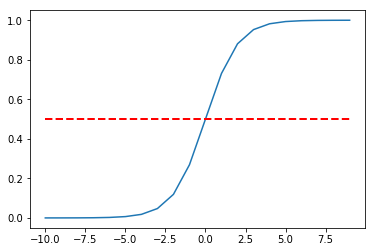

In [2]:
#Exemplo de uma Função Sigmoidal
x = np.arange(-10,10)
y = 1.0/(1+np.exp(-x))

const = np.array([0.5]*len(x))

plt.plot(x,y)
plt.plot(x,const,'--r',linewidth = 2)

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
titanic.isnull().head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Podemos observar que estamos perdendo algumas informações, como por exemplo, idade e deck

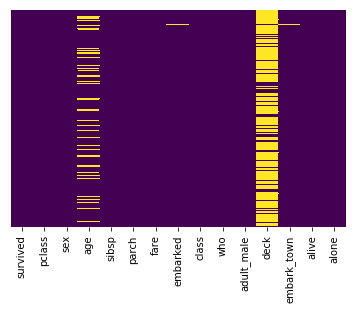

In [7]:
sns.heatmap(titanic.isnull(),yticklabels = False, cbar = False, cmap= 'viridis')

In [8]:
# Caso quisessemos remover isso, poderiamos usar
# a função dropna()

In [9]:
titanic.dropna().head(3) #Remove os não NaN

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


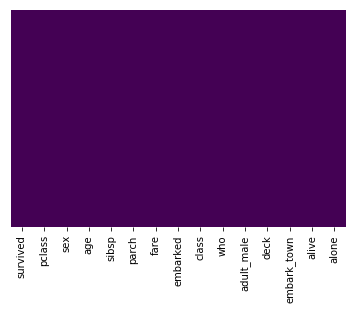

In [10]:
titanic_new = titanic.dropna()

sns.heatmap(
    titanic_new.isnull(),
    yticklabels = False,
    cbar = False,
    cmap= 'viridis',
)

#Retiramos os NaN

In [11]:
sns.set_style('whitegrid')

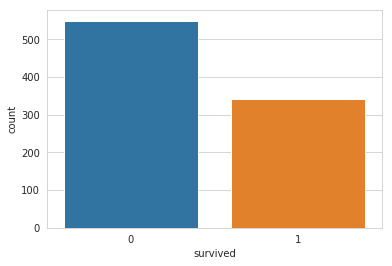

In [12]:
sns.countplot(x='survived', data = titanic)

# Na tabela de survived:

#Zero representa mortos
#1 representa vivos

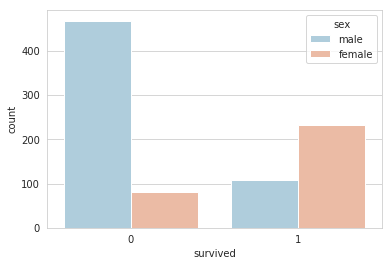

In [13]:
sns.countplot(
    x='survived',
    data = titanic,
    hue = 'sex',
    palette = 'RdBu_r'
)


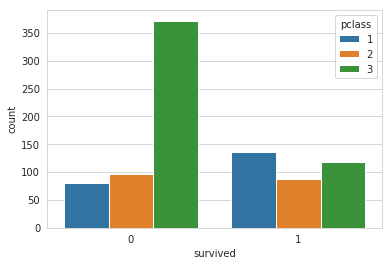

In [14]:
sns.countplot(
    x='survived',
    data = titanic,
    hue = 'pclass',
)

# Parece que as pessoas da primeira classe morreram menos

In [15]:
titanic['age'].dropna().head(3)

0    22.0
1    38.0
2    26.0
Name: age, dtype: float64

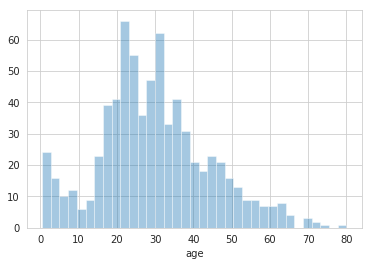

In [16]:
sns.distplot(
    a = titanic['age'].dropna(),
    kde= False, # Quando você utiliza False,
    #Ele mostra no eixo y a contagem...
    #Com Kde isso não ocorre
    bins = 35
)

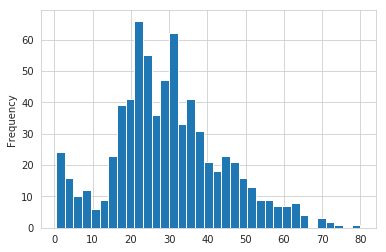

In [17]:
titanic['age'].plot(kind = 'hist',bins=35)

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


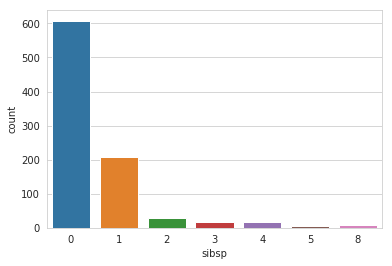

In [19]:
sns.countplot(
    x = 'sibsp',
    data = titanic,
)

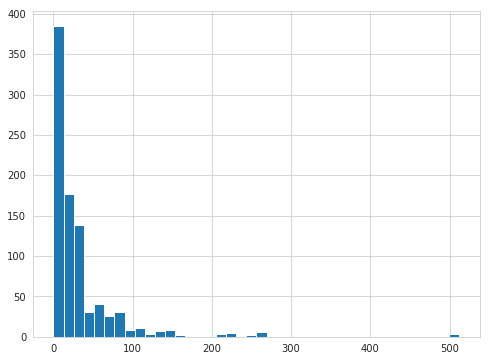

In [20]:
titanic['fare'].hist(
    bins = 40,
    figsize = (8,6),
)

In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [23]:
#titanic['fare'].iplot(kind = 'hist', bins = 30)

### Parte 2 - Logistic Regression

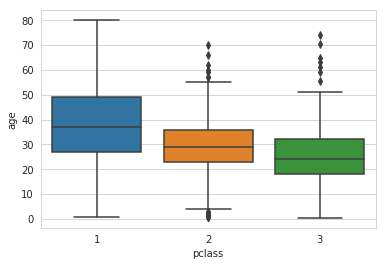

In [24]:
#plt.figure(figsize = (10,8))

sns.boxplot(x='pclass', y='age', data = titanic)

## <font color = 'red'>ÓTIMA DICA DE COMO SUBSTITUIR OS VALORES DAS IDADES</fomt>

In [25]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
titanic['age'] = titanic[['age','pclass']].apply(input_age,axis=1)

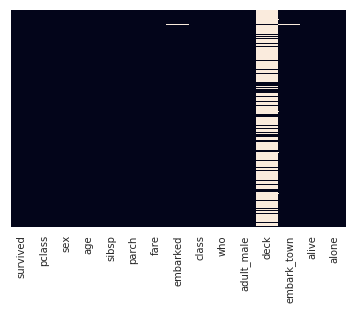

In [27]:
sns.heatmap(titanic.isnull(), yticklabels=False,
           cbar=False)

In [28]:
titanic.drop('deck',axis=1,inplace=True)

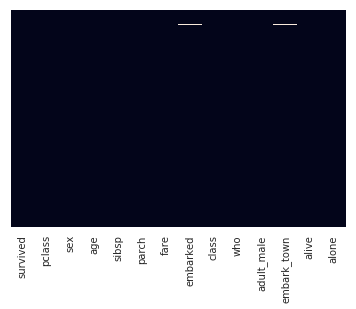

In [29]:
sns.heatmap(titanic.isnull(), yticklabels=False,
           cbar=False)

In [30]:
titanic.dropna(inplace=True)

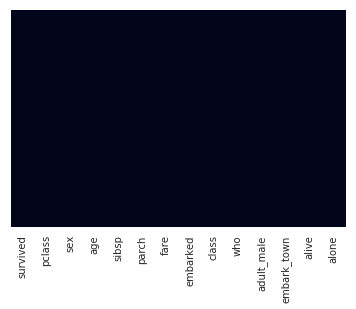

In [31]:
sns.heatmap(titanic.isnull(), yticklabels=False,
           cbar=False)

In [32]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [33]:
def sex(x):
    if x.lower() == 'male':
        return 0
    elif x.lower() == 'female':
        return 1

In [34]:
titanic['sex'] = titanic['sex'].apply(sex)

In [35]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [36]:
titanic = titanic[['survived','pclass','age','sibsp','parch','fare','embarked']]

In [37]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [38]:
titanic = pd.get_dummies(titanic,drop_first=True)

In [39]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,0,1


In [40]:
X = titanic.drop('survived',axis=1)
y = titanic['survived']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 101
)

In [56]:
X_train.shape, y_train.shape

((622, 7), (622,))

In [57]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression(
    solver = 'liblinear',
    multi_class='ovr',
)

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr.score(X_train,y_train)

0.7154340836012861

In [81]:
predic = lr.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       163
           1       0.72      0.44      0.55       104

    accuracy                           0.72       267
   macro avg       0.72      0.67      0.67       267
weighted avg       0.72      0.72      0.70       267



In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test,predic)

array([[145,  18],
       [ 58,  46]])